# SPAM Detection Case

In my day to day work , email is one of the very important tool for communication. To have effective communication, spam filtering is one of the important feature.
So how do spam filtering system actually works? Can we design. Hare we creat Spam Detection and we also do the Checking of Model Peformance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data set
df=pd.read_csv('spam.csv')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#drop unnecessary columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [4]:
#rename the columns name
df.rename(columns={'v1':'label','v2':'message'},inplace=True)
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
#label encoding
df['label'].replace({'ham':0,'spam':1},inplace=True)

In [7]:
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
df['length']=df['message'].str.len()

In [9]:
df

,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [10]:
#converting message into lowercase
df['message']=df['message'].str.lower()

In [11]:
df

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,160
5568,0,will �_ b going to esplanade fr home?,37
5569,0,"pity, * was in mood for that. so...any other s...",57
5570,0,the guy did some bitching but i acted like i'd...,125


In [12]:
#replaces email address
df['message']=df['message'].str.replace("[\w._%+-]{1,20}@[\w._]{1,20}.[A-Za-z]{2,3}",'emailaddress')

#replaces with phone number
df['message']=df['message'].str.replace("\d{3}[\s-]\d{4}[\s-]\d{3}[\s-]",'phonenumber')

#replace money symbol with money
df['message']=df['message'].str.replace(r'\$','dollars')

#replace numbers with number
df['message']=df['message'].str.replace(r'\d+(\.\d+)?','number')

#remove punctuation
df['message']=df['message'].str.replace(r'[^\w\d\s]',' ')

#replace white spaces with single space
df['message']=df['message'].str.replace(r'\s+',' ')

#replace Leading and trailing whitespace
df['message']=df['message'].str.replace(r'^\s+|\s+?$',' ')

In [13]:
aa=list(df['message'])

In [14]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [15]:
stop_words=stopwords.words('english') + ['u','ur',4,2,'r','in','dont']

In [16]:
wordnet=WordNetLemmatizer()

In [17]:
clean_data=[]
for i in aa:
    review=i.split()
    review=[word for word in review if word not in stop_words]
    review=[wordnet.lemmatize(word) for word in review]
    review=' '.join(review)
    clean_data.append(review)

In [19]:
df['message']=clean_data

In [20]:
df['clean_length']=df['message'].str.len()
df

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry number wkly comp win fa cup final t...,155,145
3,0,dun say early hor c already say,49,31
4,0,nah think go usf life around though,61,35
...,...,...,...,...
5567,1,numbernd time tried number contact number poun...,160,129
5568,0,_ b going esplanade fr home,37,27
5569,0,pity mood suggestion,57,20
5570,0,guy bitching acted like interested buying some...,125,78


In [21]:
!pip install wordcloud

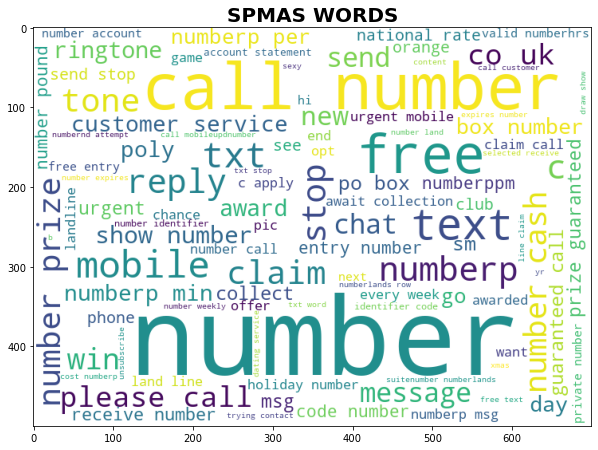

In [22]:
#for getting loud word in spam

from wordcloud import WordCloud


spams=df['message'][df['label']==1]

spam_cloud=WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(spams))
plt.figure(figsize=(10,8))
plt.imshow(spam_cloud)
plt.title('SPMAS WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.show()

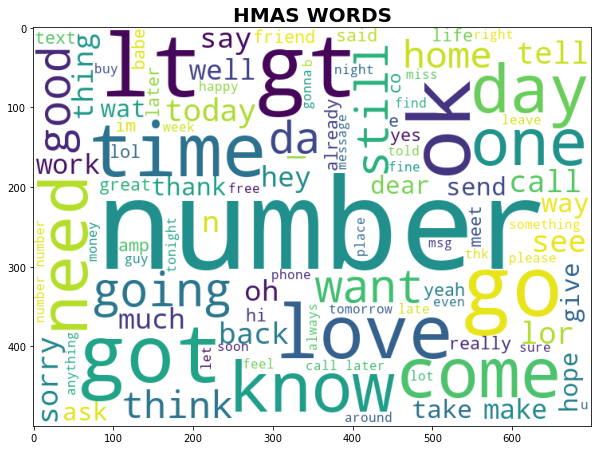

In [23]:
from wordcloud import WordCloud


hams=df['message'][df['label']==0]

ham_cloud=WordCloud(width=700,height=500,background_color='white',max_words=100).generate(' '.join(hams))
plt.figure(figsize=(10,8))
plt.title('HMAS WORDS',fontdict={'fontweight':'bold','fontsize':20})
plt.imshow(ham_cloud)
plt.show()

# Model Creation

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
tf=TfidfVectorizer()
cv=CountVectorizer()

In [26]:
features=cv.fit_transform(df['message'])

In [27]:
x=features
y=df['label']

In [28]:
pd.DataFrame(x.toarray(),columns=cv.get_feature_names())

,____,_thanks,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,...,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
x

<5572x7268 sparse matrix of type '<class 'numpy.int64'>'
	with 45853 stored elements in Compressed Sparse Row format>

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

# MultinomialNB

In [31]:
from sklearn.naive_bayes import MultinomialNB
naive=MultinomialNB()

In [32]:
naive.fit(x_train,y_train)
pred=naive.predict(x_test)

print('Accuracy_Score',accuracy_score(y_test,pred))
print('Confusion_matrix\n',confusion_matrix(y_test,pred))
print('Classification_Report\n',classification_report(y_test,pred))

Accuracy_Score 0.9772727272727273
Confusion_matrix
 [[1426   27]
 [  11  208]]
Classification_Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1453
           1       0.89      0.95      0.92       219

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672



# RandomForest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print('Accuracy_Score',accuracy_score(y_test,pred_rfc))
print('Confusion_matrix\n',confusion_matrix(y_test,pred_rfc))
print('Classification_Report\n',classification_report(y_test,pred_rfc))

Accuracy_Score 0.9850478468899522
Confusion_matrix
 [[1453    0]
 [  25  194]]
Classification_Report
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       1.00      0.89      0.94       219

    accuracy                           0.99      1672
   macro avg       0.99      0.94      0.97      1672
weighted avg       0.99      0.99      0.98      1672



0=hams 1=spams

# Conclusion or Checking Model Performance

In [35]:
print(naive.predict(cv.transform(['you won cash, please claim your money'])))

[1]


In [36]:
print(rfc.predict(cv.transform(['very good amazing movie please watch'])))

[0]


In [37]:
print(naive.predict(cv.transform(['come to my home'])))

[0]
